In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [102]:
df = pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\Desktop\\obesity_level.csv")
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


# BUSINESS UNDERSTANDING:

Objective:
To classify individuals into obesity levels based on lifestyle, dietary habits, and physical activity. The goal is to build a predictive model and identify key factors contributing to obesity in Mexico, Peru, and Colombia.

Key Questions:
1) What features most influence obesity levels?  
2) How accurately can we classify individuals into obesity categories?  


#DATA INFORMATION:

The data contains 19 attributes and 2111 records.

Gender is 1 if a respondent is male and 0 if a respondent is female.

Age is a respondent’s age in years.

family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.

FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.

FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.

NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.

SMOKE is 1 if a respondent smokes, 0 if not.

CH2O represents how much water a respondent drinks on a scale of 0 to 2.

SCC is 1 if a respondent monitors their caloric intake, 0 if not.

FAF represents how much physical activity a respondent does on a scale of 0 to 3.

TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.

MTRANS : Feature, Categorical, " Which transportation do you usually use? 

NObeyesdad is a 1 if a patient is obese and a 0 if not.

In [105]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad'],
      dtype='object')

In [106]:
df.rename(columns={
    'id': 'id',
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'fam_hist_ow',
    'FAVC': 'high_cal_food',
    'FCVC': 'veg_meals',
    'NCP': 'main_meals',
    'CAEC': 'snack_freq',
    'SMOKE': 'smokes',
    'CH2O': 'water_intake',
    'SCC': 'calorie_monitor',
    'FAF': 'phys_activity',
    'TUE': 'screen_time',
    'CALC': 'alcohol_freq',
    'MTRANS': 'transport_mode',
    '0be1dad': 'obesity_level'
}, inplace=True)

# Exploratory Data Analysis

In [108]:
df.isna().sum()

id                 0
gender             0
age                0
height             0
weight             0
fam_hist_ow        0
high_cal_food      0
veg_meals          0
main_meals         0
snack_freq         0
smokes             0
water_intake       0
calorie_monitor    0
phys_activity      0
screen_time        0
alcohol_freq       0
transport_mode     0
obesity_level      0
dtype: int64

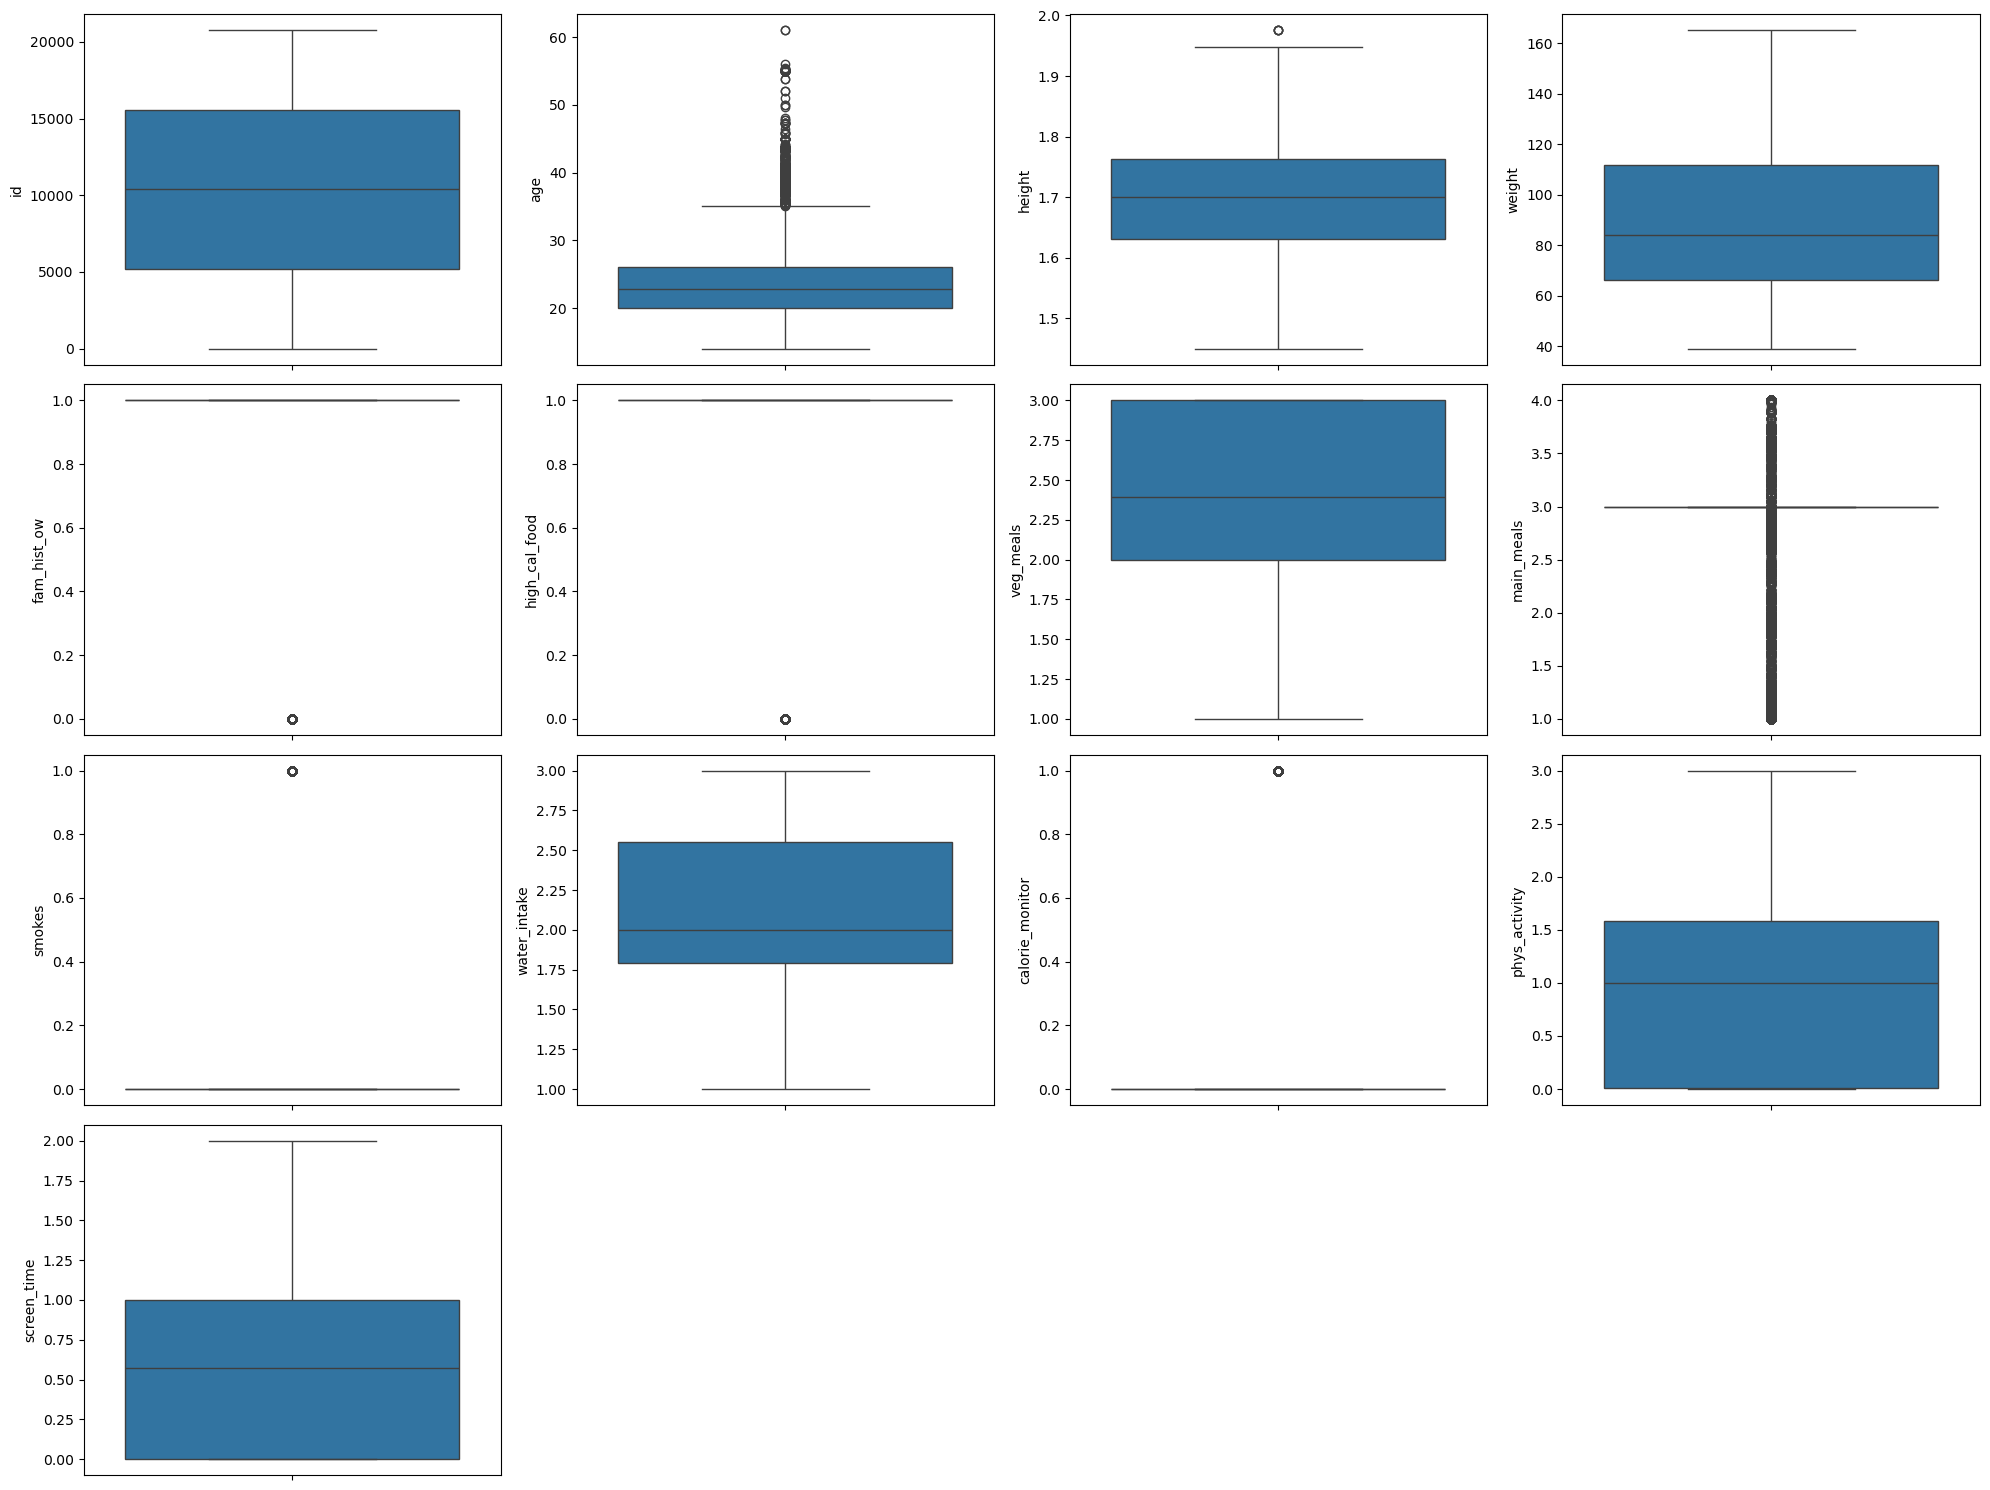

In [109]:
numeric_attributes = df.select_dtypes(include=[np.number]).columns

# Visualize the distribution of numerical attributes using boxplots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_attributes, 1):
    plt.subplot(4, 4, i)  # Adjusted subplot dimensions to accommodate all numerical attributes
    sns.boxplot(data=df, y=col)
    plt.tight_layout()
plt.show()

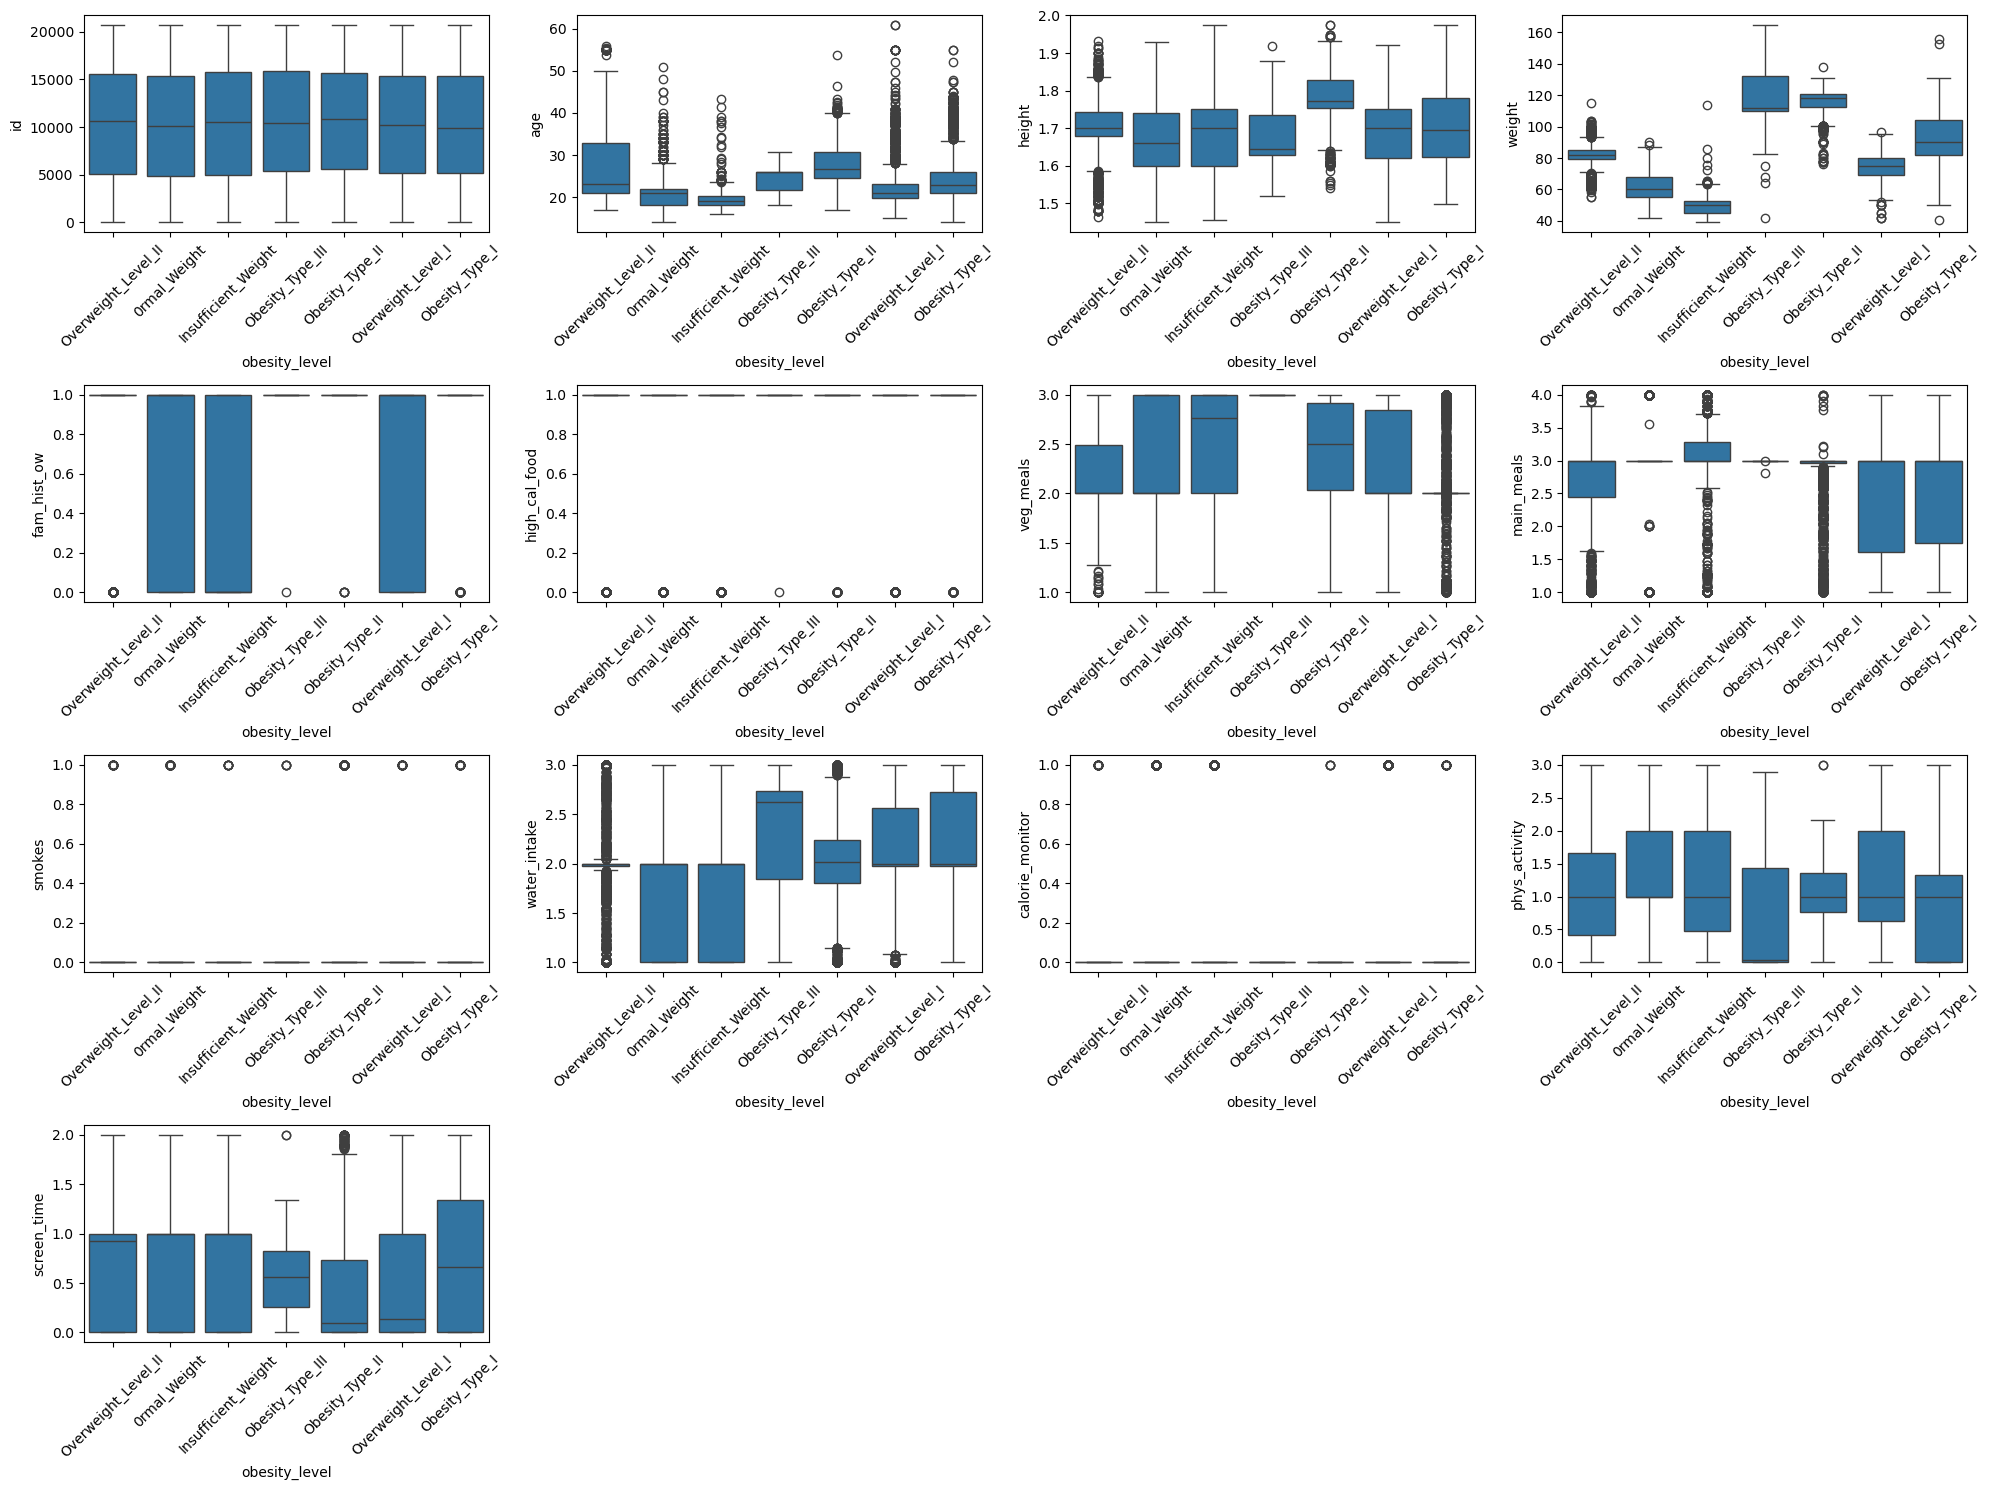

In [110]:
#Check relationship between different attributes and Obesity level(y)
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_attributes, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='obesity_level', y=col)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

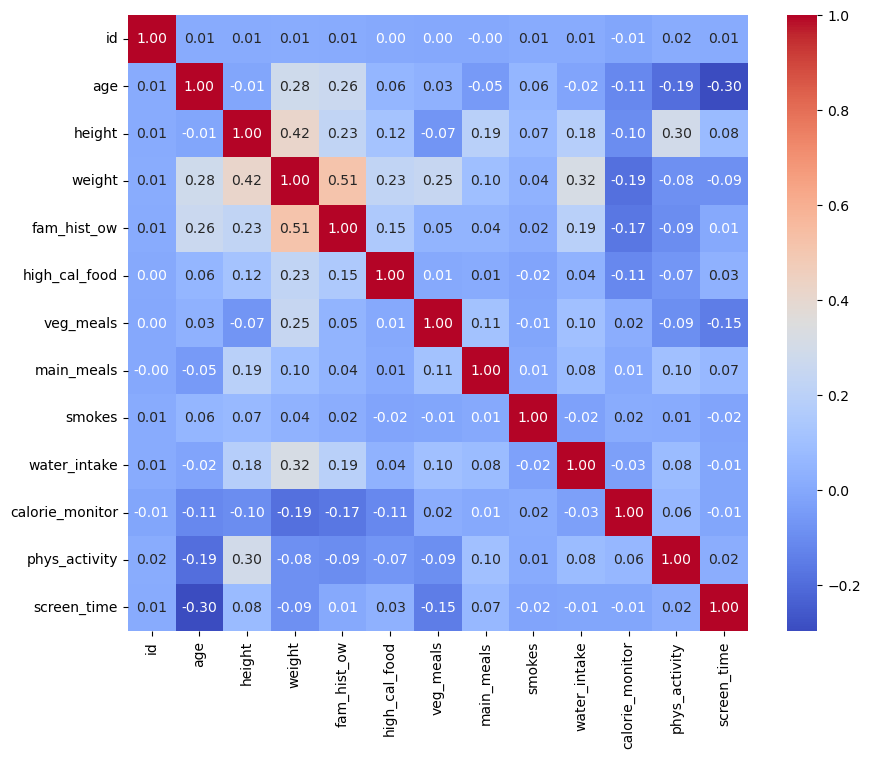

In [111]:
# Calculate and visualize the correlation matrix for numerical attributes
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_attributes].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Data Preparation

In [113]:
# Encoding categorical variables using Label Encoding
label_encoders = {}
for column in ['gender', 'snack_freq', 'alcohol_freq', 'transport_mode']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [114]:
#Normalizing numerical attribute
numerical_columns = [
    'age', 'height', 'weight', 'fam_hist_ow', 
    'high_cal_food', 'veg_meals', 'main_meals', 
    'smokes', 'water_intake', 'calorie_monitor', 
    'phys_activity', 'screen_time'
]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [115]:
# Splitting the data
X = df.drop(['obesity_level', 'id'], axis=1)  # Excluding 'id' and target variable
y = df['obesity_level']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23316144)

# MODELLING:

1) Random Forest

In [117]:
# Initialize the RandomForest model
model = RandomForestClassifier(random_state=23316144)

# Train the RandomForest model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the RandomForest model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

print(f"RandomForest Performance:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nAUC-ROC: {auc}")


RandomForest Performance:
Accuracy: 0.9077552986512524
Precision: 0.9078698298717379
Recall: 0.9077552986512524
F1 Score: 0.9077002864078608
AUC-ROC: 0.9897016170421844


2) Support Vector Machine

In [119]:
# Initialize the SVM model
model = SVC(probability=True, random_state=23316144)

# Train the SVM model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

print(f"SVM Performance:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nAUC-ROC: {auc}")


SVM Performance:
Accuracy: 0.8745183044315993
Precision: 0.8749503796292634
Recall: 0.8745183044315993
F1 Score: 0.8745933475341955
AUC-ROC: 0.9861384847380135
